# Valence, arousal analysis based on musical information

In [21]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

In [ ]:
input_dir = './nesmdb_tx1/train/'

Calculate arousals with tempo, which is indirectly derived from intervals between notes.
Interval shorter than 200 frames are ignored(they are played simultaneously).
Arbitarily, song with less than 2500 average interval is considered fast, more than 5000 slow, and the rest mid-tempo.
Each of them are assigned 1, 0, -1 for their arousal value.

In [26]:
def average_interval(fname):
    time, num = 0, 0
    with open(fname) as f:
        for line in f.readlines():
            words = line.split('_')
            if words[0] == 'WT' and int(words[1]) >= 200:
                time += int(words[1])
                num += 1
    return time//num

In [44]:
def get_arousal(fname):
    avg_interval = average_interval(fname)
    if avg_interval < 2500:
        return 1
    elif avg_interval < 5000:
        return 0
    else:
        return -1

In [27]:
interval_dict = {fname.split('.')[0]: average_interval(input_dir+fname) for fname in os.listdir(input_dir)}

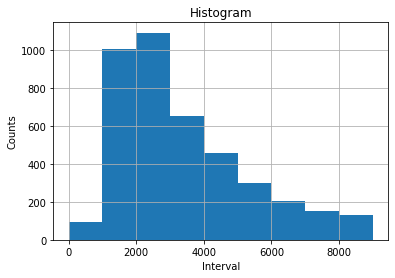

In [28]:
plt.hist(list(interval_dict.values()), bins=np.arange(0, 10000, 1000))
plt.xlabel('Interval')
plt.ylabel('Counts')
plt.title('Histogram')
plt.grid(True)
plt.show()
# fast if [0, 2500) slow if [5000, inf)

In [30]:
def get_chroma(fname):
    chroma = [0]*12
    with open(fname) as f:
        for line in f.readlines():
            words = line.split('_')
            if len(words) == 3 and words[0] != 'NO':
                chroma[int(words[2]) % 12] += 1
    return chroma

In [32]:
print(get_chroma(input_dir + '227_MegaMan4_24_25LastBoss.tx1.txt'))

[58, 16, 3, 20, 8, 41, 2, 12, 36, 11, 43, 12]


In [36]:
Cmaj_key_prof = [6.35,2.23,3.48,2.33,4.38,4.09,2.52,5.19,2.39,3.66,2.29,2.88]
Cmin_key_prof = [6.33,2.68,3.52,5.38,2.60,3.53,2.54,4.75,3.98,2.69,3.34,3.17]
maj_prof = [] 
min_prof = [] 

for i in range(0,12): 
    maj_prof.append(np.roll(Cmaj_key_prof,i))
    min_prof.append(np.roll(Cmin_key_prof,i))

key_prof = maj_prof + min_prof
key_prof = np.transpose(key_prof)

estimated key : c


In [46]:
def get_valence(fname):
    chroma = get_chroma(fname)
    cor = []
    for i in range(0,24):
        cor.append(np.corrcoef(get_chroma(fname),key_prof[:,i])[0,1])
    key_label = ['C','C#','D','Eb','E','F','F#','G','Ab','A','Bb','B','c','c#','d','eb','e','f','f#','g','ab','a','bb','b']
    return 1 if key_label.index(key_label[np.argmax(cor)]) < 12 else -1

In [47]:
emotion_dict = {fname.split('.')[0]: (get_valence(input_dir+fname), get_arousal(input_dir+fname)) for fname in os.listdir(input_dir)}
print(emotion_dict)

{'346_TheJungleBook_08_09BossEncounter': (1, 0), '042_CaptainTsubasaVol_II_SuperStriker_32_33CycloneLearning': (-1, 1), '245_MoonCrystal_15_16Death': (1, 1), '162_HiryunoKenSpecial_FightingWars_00_01Title': (-1, 0), '314_SummerCarnival_92_Recca_06_07ELM39Stage3Stage4': (1, 1), '135_GanbareGoemonGaiden2_TenkanoZaih__65_66AntarcticMap': (-1, 0), '370_ValkyrienoBouken_TokinoKagiDensetsu_06_07BGMBUnderground': (-1, 0), '301_Solstice_TheQuestfortheStaffofDemnos_01_02Introduction': (1, 1), '310_StarWars_TheEmpireStrikesBack_06_07Cantina': (-1, 0), '312_Stinger_00_01Introduction': (-1, 0), '255_NobunaganoYabou_BushouFuunroku_21_22Merchant': (-1, 0), '228_MegaMan5_22_23Escape': (1, 1), '329_SwordMaster_14_15StaffRoll': (-1, 1), '398_Ys_AncientYsVanishedOmen_13_14TowerofTheShadowofDeath3': (1, 1), '266_PoolofRadiance_13_14WildernessTheme': (1, 0), '142_Ghosts_nGoblins_10_112ndLapClear': (-1, -1), '138_Gargoyle_sQuestII_01_02Opening': (-1, -1), '248_MusashinoKen_TadaimaShugyouChuu_02_03FightStar

In [49]:
import json

with open("va_dictionary.json", "w") as json_file:
    json.dump(emotion_dict, json_file, indent=4)